# Spaceship Titanic

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
train_data = pd.read_csv("train_space.csv")
test_data = pd.read_csv("test_space.csv")

In [3]:
train_data.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0001_01     Europa     False  B/0/P  TRAPPIST-1e  39.0  False   
1     0002_01      Earth     False  F/0/S  TRAPPIST-1e  24.0  False   
2     0003_01     Europa     False  A/0/S  TRAPPIST-1e  58.0   True   
3     0003_02     Europa     False  A/0/S  TRAPPIST-1e  33.0  False   
4     0004_01      Earth     False  F/1/S  TRAPPIST-1e  16.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck               Name  \
0          0.0        0.0           0.0     0.0     0.0    Maham Ofracculy   
1        109.0        9.0          25.0   549.0    44.0       Juanna Vines   
2         43.0     3576.0           0.0  6715.0    49.0      Altark Susent   
3          0.0     1283.0         371.0  3329.0   193.0       Solam Susent   
4        303.0       70.0         151.0   565.0     2.0  Willy Santantines   

   Transported  
0        False  
1         True  
2        False  
3        False  
4         True

In [4]:
train_data.shape

(8693, 14)

In [5]:
train_data.dtypes

PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object

In [6]:
train_data.isnull().any()

PassengerId     False
HomePlanet       True
CryoSleep        True
Cabin            True
Destination      True
Age              True
VIP              True
RoomService      True
FoodCourt        True
ShoppingMall     True
Spa              True
VRDeck           True
Name             True
Transported     False
dtype: bool

In [7]:
y = train_data['Transported']
train_data = train_data.drop(['PassengerId', 'Name', 'Transported'], axis = 1)
test_data = test_data.drop(['PassengerId', 'Name'], axis = 1)

In [8]:
for i in train_data.columns:
    if i == "Age":
        train_data[i] = train_data[i].fillna(train_data[i].mean())
        test_data[i] = test_data[i].fillna(test_data[i].mean())
    else:
        train_data[i] = train_data[i].fillna(train_data[i].mode()[0])
        test_data[i] = test_data[i].fillna(test_data[i].mode()[0])

In [9]:
train_data.isnull().any()

HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
dtype: bool

In [10]:
test_data.isnull().any()

HomePlanet      False
CryoSleep       False
Cabin           False
Destination     False
Age             False
VIP             False
RoomService     False
FoodCourt       False
ShoppingMall    False
Spa             False
VRDeck          False
dtype: bool

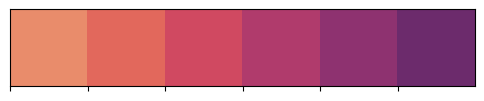

In [11]:
palette = sns.color_palette('flare')
sns.palplot(palette)

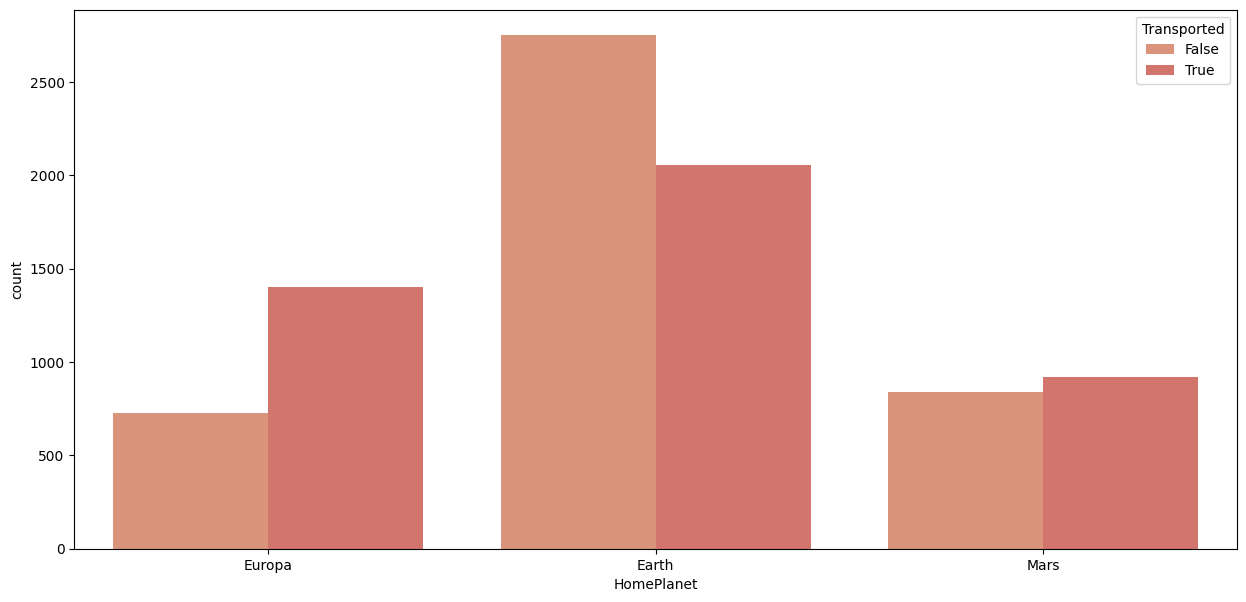

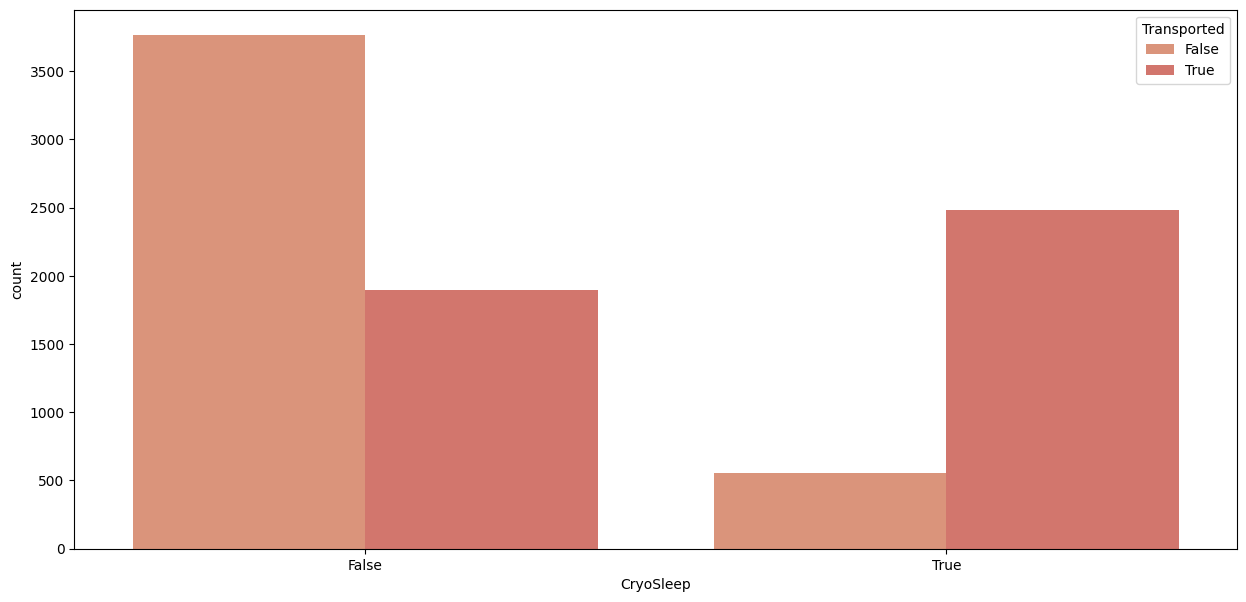

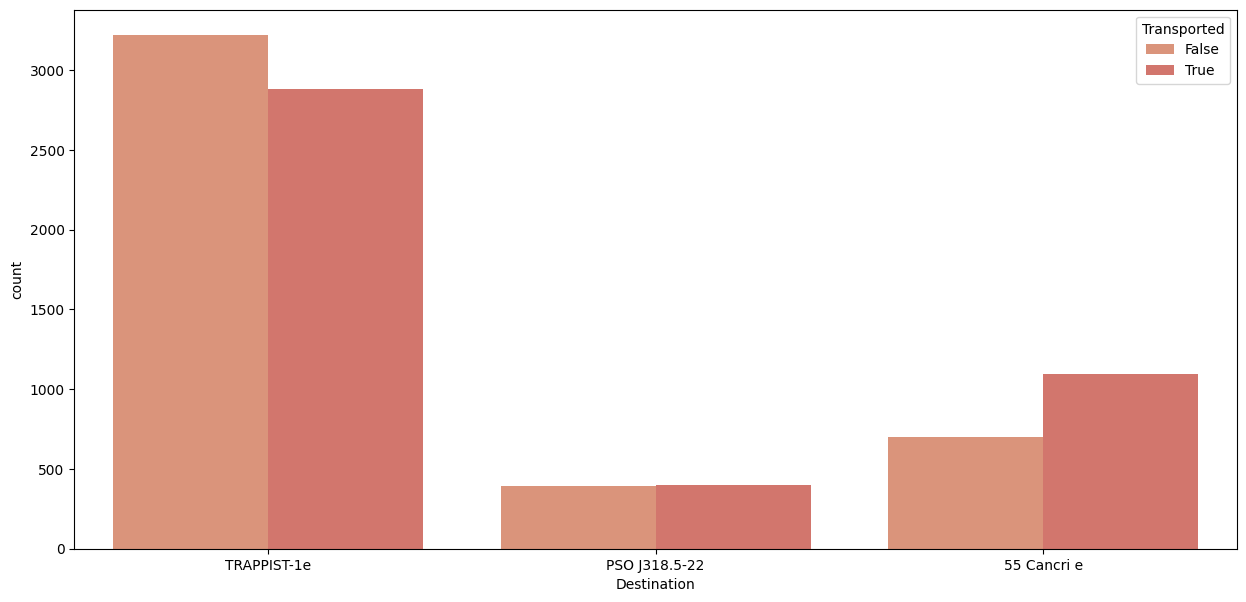

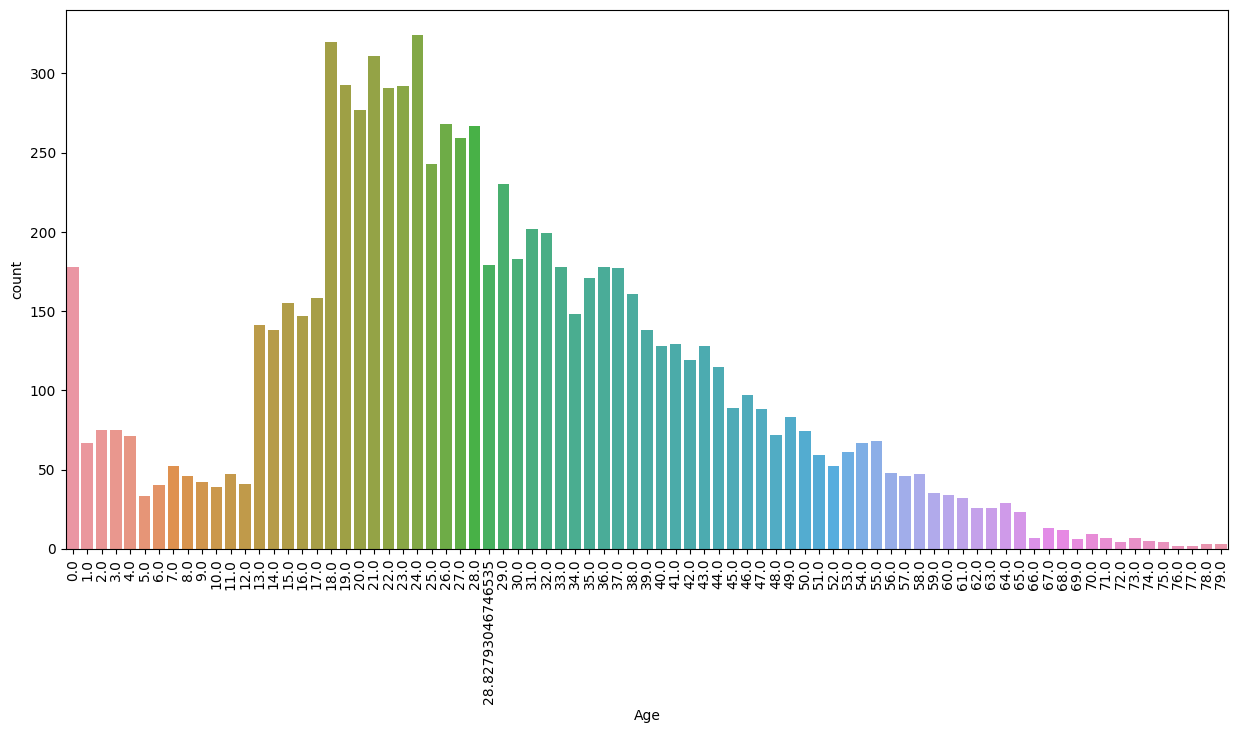

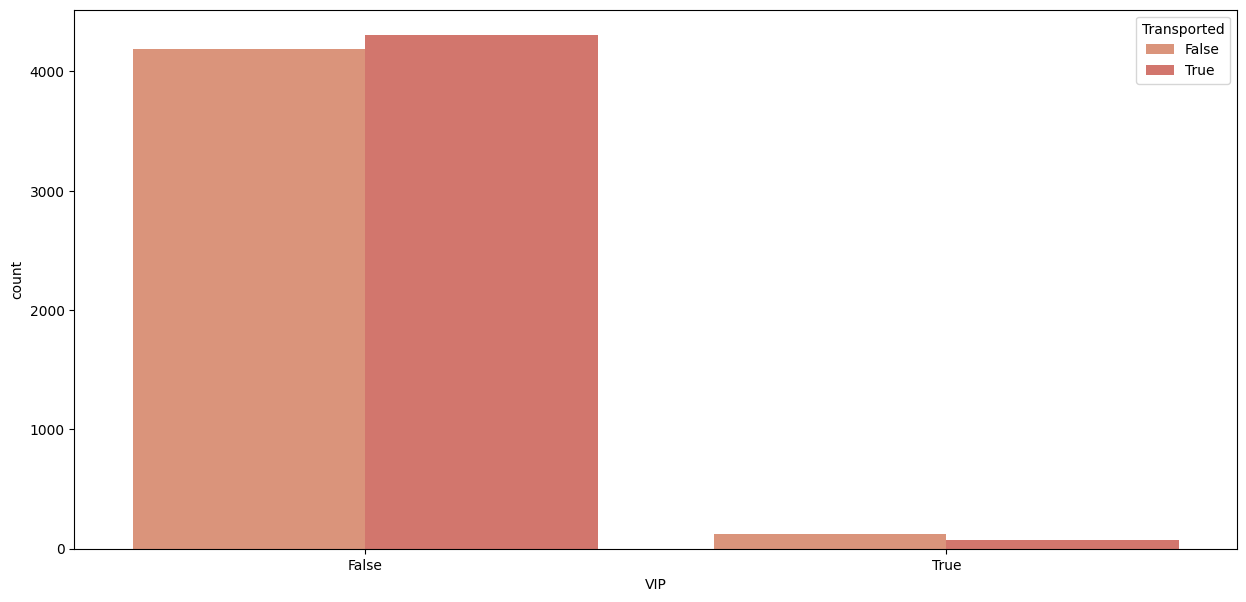

In [12]:
import matplotlib.pyplot as plt
v_features = ['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP']
for i in v_features:
    plt.figure(figsize=(15, 7))
    if i == 'Age':
        sns.countplot(x = train_data[i])
        plt.xticks(rotation = 90)
    else:
        sns.countplot(x = train_data[i], hue = y, palette=palette)
    plt.show()

In [13]:
train_data['Cabin'].nunique()

6560

In [14]:
train_data = train_data.drop(['Cabin'], axis = 1)
test_data = test_data.drop(['Cabin'], axis = 1)

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
cat_features = ['HomePlanet', 'Destination']
for i in cat_features:
    train_data[i] = le.fit_transform(train_data[i])
    test_data[i] = le.fit_transform(test_data[i])

In [16]:
y = le.fit_transform(y)

In [17]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [18]:
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size = 0.2)

In [19]:
rf = RandomForestClassifier()
params = {
    'n_estimators' : [100, 200, 300,400,500,600,700],
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [1, 3, 7, 9,11,13,15],
}
searcher = GridSearchCV(rf, params, cv = 3)
searcher.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 3, 7, 9, 11, 13, 15],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]})

In [20]:
searcher.best_params_

{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 600}

In [21]:
rf = RandomForestClassifier(criterion='entropy', n_estimators = 600, max_depth = 9)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)
rf_score = accuracy_score(rf_pred, y_test)
rf_score

0.7998849913743531

In [22]:
dt = DecisionTreeClassifier()
params = {
    'criterion' : ['entropy', 'gini'],
    'max_depth' : [i for i in range(11)],
    'splitter' : ['best', 'random'],
}
searcher = GridSearchCV(dt, params, cv = 5)
searcher.fit(X_train, y_train)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 220.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']})

In [23]:
searcher.best_params_

{'criterion': 'entropy', 'max_depth': 8, 'splitter': 'best'}

In [34]:
dt = DecisionTreeClassifier(splitter='best', criterion='gini', max_depth=8)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)
dt_score = accuracy_score(dt_pred, y_test)
dt_score

0.772857964347326

In [35]:
ind = ['RandomForest', 'DecisionTree']
scores = pd.DataFrame({'Scores' : [rf_score, dt_score]}, index=ind)

In [36]:
scores

Scores
RandomForest  0.799885
DecisionTree  0.772858

In [37]:
test_data_sub = pd.read_csv('test_space.csv')
test_data_sub.head()

PassengerId HomePlanet CryoSleep  Cabin  Destination   Age    VIP  \
0     0013_01      Earth      True  G/3/S  TRAPPIST-1e  27.0  False   
1     0018_01      Earth     False  F/4/S  TRAPPIST-1e  19.0  False   
2     0019_01     Europa      True  C/0/S  55 Cancri e  31.0  False   
3     0021_01     Europa     False  C/1/S  TRAPPIST-1e  38.0  False   
4     0023_01      Earth     False  F/5/S  TRAPPIST-1e  20.0  False   

   RoomService  FoodCourt  ShoppingMall     Spa  VRDeck              Name  
0          0.0        0.0           0.0     0.0     0.0   Nelly Carsoning  
1          0.0        9.0           0.0  2823.0     0.0    Lerome Peckers  
2          0.0        0.0           0.0     0.0     0.0   Sabih Unhearfus  
3          0.0     6652.0           0.0   181.0   585.0  Meratz Caltilter  
4         10.0        0.0         635.0     0.0     0.0   Brence Harperez

In [38]:
pred_sub = rf.predict(test_data)
pred_sub = pred_sub > 0

In [39]:
submission = pd.DataFrame({'PassengerId':test_data_sub['PassengerId'], 'Transported' : pred_sub})

In [40]:
submission.to_csv('submission.csv', index=False)

In [41]:
submission

PassengerId  Transported
0        0013_01         True
1        0018_01        False
2        0019_01         True
3        0021_01         True
4        0023_01         True
...          ...          ...
4272     9266_02         True
4273     9269_01        False
4274     9271_01         True
4275     9273_01         True
4276     9277_01        False

[4277 rows x 2 columns]